In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import scipy.stats
from statsmodels.graphics.mosaicplot import mosaic

### Hypothesis test based on the chi-squared distribution for one-way tables

A one-way table is a tabular representation of a bar plot. It represents the frequency of the value of each value of a categorical variable in a sample, that is, the number of observations in the sample that are assigned each value of a categorical variable.

Hypothesis test based on the chi-squared distribution for one-way tables has two main applications:

- Given a sample in which the observations are split into groups, we use this hypothesis test to check whether the observed sample group frequencies match the expected population group frecuencies.
- To test whether a sample follows a given theoretical distribution.

#### Observed vs. expected group frequencies

All the workers in a very large factory are unionised. A 20% of the 10000 workers in the factory are part of UnionA, 15% are part of UnionB, and the remaining 65% are part of UnionC. There are three different unions in the factory. A small representation of 100 factory workers is to be randomly selected to act as facilitators between the workers and the owners of the factory. The table below indicates how many workers from each union were selected:

|UnionA|UnionB|UnionC|Total |
|------|------|------|------|
|   22 |   23 |   55 |  100 |

The question we will answer know is whether this is a good representation of the proportion of workers in each union in the total population of the factory. More specifically, we are carrying out a hypothesis test with the following hypothesis:

```
H0: the sample is unbiased. The frequency of each union in the sample is equal to the frequency of each union in the population.
HA: the sample is biased. Some of the unions are over or under-represented
```

Since the number of groups is greater than two (three unions) we use a one-way table chi-squared tests. Otherwise, we would have carried out a hypothesis test for the difference of proportions. 

The first step is to calculate the expected frequencies for each union, to compare to the observed frequencies in the table above:

In [2]:
frequencies = np.array([0.2, 0.15, 0.65])
observed = np.array([22, 23, 55])

expected = 100*frequencies

print('Expected frequencies per union:')
print(expected)

Expected frequencies per union:
[20. 15. 65.]


The test statistic to use in this kind of thest is the X2 statistic, that is calculated as the sum of the squared differences between expected and observed frequencies divided by expected frequencies for each group in the sample:

In [3]:
x2 = np.sum((observed-expected)**2/expected)
print('x2 = ' + str(x2))

x2 = 6.005128205128205


The p-value is obtained by comparing the value of the X2 statistic against the upper tail of the chi-squared distribution with k-1 degrees of freedom, where k is the number of groups. The chi-squared distribution is used to represent datasets or statistics that are always positive and usually right-skewed.

In the case of our example, we use a chi-squared distribution with 2 degrees of freedom (3 groups minus one):

In [4]:
p_value = 1 - scipy.stats.chi2.cdf(x2, 2)
print('p-value = ' + str(p_value))

p-value = 0.049659572743983804


The p-value is lower than the significance level, so we reject the null hypothesis. There seems to be a bias in the selection of the workers that is not due to random variation. In other words, the observed frequency does not correspond to what we would expect to be the frequency of the groups.

#### Observed frequencies vs. values of a theoretical distribution

This same kind of test can be applied to the problem of determining whether the observed sample resembles a given theoretical distribution. In this example, we are trying to determine whether a coin is a fair coin by collecting data about 100 tossing experiments. In each experiment we count the number of times we have to toss a coin until we get heads. Therefore, we obtain a sample of 100 values. If the coin is fair, this sample should look like a sample we would have obtained from a geometric distribution with p=0.5. 

The results of this process are collected in the following one-way table. The top row represents the observed number of tossing experiments in the sample for each number of tosses. The bottom row represents the expected cound we would get from a sample with 100 observations extracted from a geometric distribution with p=0.5.

|          | 1  | 2  | 3    | 4    | 5+   |
|----------|---:|---:|-----:|-----:|-----:|
| Observed | 40 | 24 | 14   | 9    | 13   |
| Expected | 50 | 25 | 12.5 | 6.25 | 6.25 |

Note that we grouped together the counts for tossing values of 5 or more into the same table cell to make sure that the number of expected counts is at least 5 in each cell. 

We carry out the hypothesis test following exactly the same steps we followed in the previous example. In this case we are using the chi-squared distribution with four degrees of freedom, because the one-way table contains data about five groups. 

```
H0: the observed counts resemble the counts we would expect to get if the population is geometrically distributed with p=0.5
HA: the observed counts do not resemble a sample from a geometrical distribution with p=0.5
```

In [5]:
observed = np.array([40, 24, 14, 9, 13])
expected = np.array([50, 25, 12.5, 6.25, 6.25])

x2 = np.sum((observed-expected)**2/expected)
print('x2 = ' + str(x2))

p_value = 1 - scipy.stats.chi2.cdf(x2, 4)
print('p-value = ' + str(p_value))

x2 = 10.72
p-value = 0.029897762844229625


The p-value is lower than 0.05, so we reject the null hypothesis. We conclude that the coin is a loaded coin. In fact, the observed values in this example were simulated using a geometric distribution with p=0.4 (the probability of obtaining heads in each coin toss is 0.4)

#### Testing independence

We can apply a chi-squared hypothesis test on a two-way table to test the independence of two categorical variables. For this example our hypothesis is that the probability of being vegetarian is independent of having a pet at home. We asked to a sample of 407 people and summarised their answers below, split between people having at least one dog, people having at least one cat, people having at least one dog and one cat, and people not having pets. 


|                | dogs | cats | dogs and cats | no pets | total |
|----------------|-----:|-----:|--------------:|--------:|------:|
| Vegetarian     | 23   |  30  |     13        |    20   |  91   |
| Non-vegetarian | 95   |  83  |     42        |   101   |  316  |   
| Total          | 118  |  113 |     55        |   121   |  407  |

We can visualise this contingence table by means of a mosaic plot, in which each cell is represented as a box. The area of each box represents the count for that cell. The width of all boxes in the same column is the same, and the height of a cell is proportional to the relative count of that cell with respect to the total count in the cell's column.

In [6]:
observed = np.array([
    [23, 30, 13, 20],
    [95, 83, 42, 101]
])

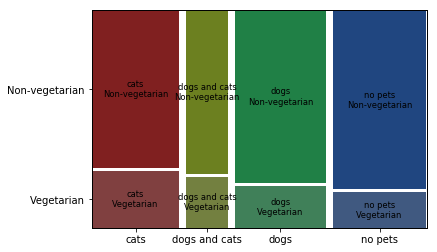

In [7]:
columns_list = ['dogs', 'cats', 'dogs and cats', 'no pets']
observed_df = pd.DataFrame(observed, 
                           index = ['Vegetarian', 'Non-vegetarian'],
                           columns = columns_list)
# Reordering the columns
observed_df = observed_df[['cats', 'dogs and cats', 'dogs', 'no pets']] \
                .unstack() 
# Mosaic plot
m = mosaic(observed_df,  gap=0.02)

There are some differences between the proportion of vegetarians and non-vegetarians in each group of pet-owners. Are these differences due to randomness?

```
H0: the two variables are independent
HA: the two variables are not independent
```

The first step is to calculate the expected counts for each cell of the table. Computing the expected counts is based on using the row and column totals:

In [8]:
total_row = np.sum(observed, axis=1)
total_col = np.sum(observed, axis=0)
total = np.sum(observed)

In [9]:
# Computing the expected frequencies, and printing them on the screen so we can compare
# to the observed frequencies above
tr = np.tile(total_row.reshape((2,1)), 4)
tc = np.tile(total_col, (2,1))
expected = np.multiply(tr, tc)/total
print(expected)

[[24.93366093 23.87714988 11.62162162 25.56756757]
 [93.06633907 89.12285012 43.37837838 95.43243243]]


In [10]:
x2 = np.sum((observed-expected)**2/expected)
print('x2 = ' + str(x2))

x2 = 3.9253571113011416


The degrees of freedom on a two-way table chi-squared test are equal to the number of rows minus one times the number of columns minus one. In our case that would be (2-1)\*(4-1) = 3

In [11]:
p_value = 1 - scipy.stats.chi2.cdf(x2, 3)
print('p-value = ' + str(p_value))

p-value = 0.2696378374024535


The p-value is higher than 0.5, so we fail to reject the null hypothesis. We cannot confirm whether being vegegarian or not depends on having pets at home. 